# Principle Component Analysis (PCA)
### Author: _Duncan Kirby_
## Plan:
- Implementing PCA
- Simple 2D Example
- More complicated example


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.decomposition import PCA
from keras.datasets import mnist
from sklearn.manifold import TSNE, MDS


C:\Users\Duncan\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Naive Implementation

Generate linear data with noise

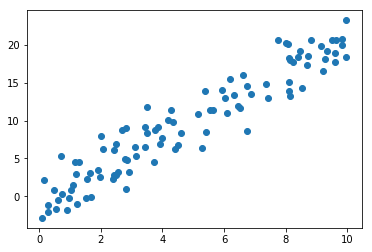

In [2]:
raw_data_x = np.random.uniform(0,10, size=(100,))
raw_data_y = 2*raw_data_x+np.random.normal(0,2,len(raw_data_x))
plt.scatter(raw_data_x, raw_data_y)

# Compute principle components via eigenvectors of covariance matrix
-First subtract the mean from the data
-Compute the covariance matrix
-Compute eigenvectors and order them in terms of decreasing eigenvalues
-Transform the data using these eigenvectors
-Compare to library PCA implementation

(-6, 6)

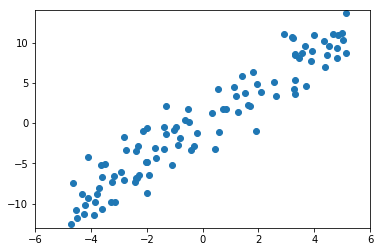

In [3]:
raw_data_x = raw_data_x-np.mean(raw_data_x)
raw_data_y = raw_data_y-np.mean(raw_data_y)
plt.scatter(raw_data_x, raw_data_y)
plt.ylim((-13,14))
plt.xlim((-6,6))

### We see that the data is now centered on the origin.
### Now compute the transformation.

In [16]:
X = list(zip(raw_data_x,raw_data_y))
Cov = np.dot(np.transpose(X),X)
print("Covariance matrix:")
print(Cov)
Eigvals, W = np.linalg.eig(Cov)
print("\nEigenvalues:")
print(Eigvals)
print("\nEigenvectors (columns)")
print(W)
print("\nCheck that eigenvectors are orthogonal (<w1,w2>=0):")
np.dot(np.transpose(W[:,0]),W[:,1])

Covariance matrix:
[[ 933.53480179 2018.26651352]
 [2018.26651352 4847.02422005]]

Eigenvalues:
[  79.18549323 5701.37352861]

Eigenvectors (columns)
[[-0.92089072 -0.38982084]
 [ 0.38982084 -0.92089072]]

Check that eigenvectors are orthogonal (<w1,w2>=0):


0.0

### Let's plot the eigenvectors in comparison to the data

(-6, 6)

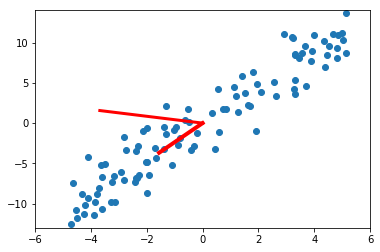

In [23]:
plt.scatter(raw_data_x, raw_data_y)
plt.plot([0,W[0][1]*4],[0,W[1][1]*4],'r',linewidth=4)
plt.plot([0,W[0][0]*4],[0,W[1][0]*4],'r',linewidth=3)
plt.ylim((-13,14))
plt.xlim((-6,6))

### Now we will apply the transformation to the data and plot the data in the new space. We flip the matrix W and corresponding eigenvalues so that they are ordered the same way as in the theory.

(-6, 6)

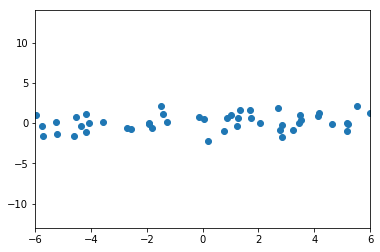

In [24]:
W = np.fliplr(W)
Eigvals = Eigvals[::-1]
X_transform = np.dot(X,W)
plt.scatter([el[0] for el in X_transform],[el[1] for el in X_transform])
plt.ylim((-13,14))
plt.xlim((-6,6))

### Let's compare our naive implementation to the PCA implementation from sklearn

(-6, 6)

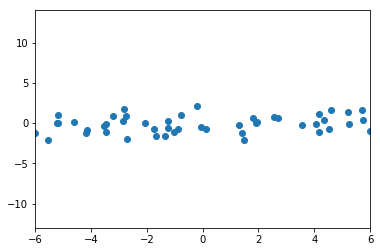

In [25]:
sklearnPCA = PCA(n_components = 2).fit(X)
sklearnX_transform = sklearnPCA.transform(X)
plt.scatter([el[0] for el in sklearnX_transform],[el[1] for el in sklearnX_transform])
plt.ylim((-13,14))
plt.xlim((-6,6))

### Looks identical (up to a left-right flip)! 


### We will now truncate the data to one dimension and see how it looks.

(-6, 6)

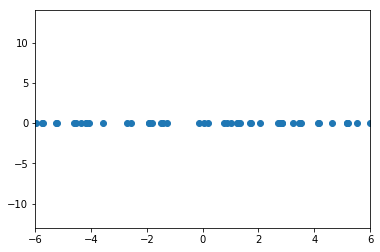

In [26]:
X_truncated = np.dot(X,W[:,0])
plt.scatter(X_truncated,np.zeros(shape=(1,len(X_truncated))))
plt.ylim((-13,14))
plt.xlim((-6,6))

### Well, there are some limitations. 2D data doesn't benefit a whole lot from dimensionality reduction.

## More Complicated Example

### Load some data from the MNIST dataset. We'll apply PCA to this data and see if we can cluster on the transformed data.

In [33]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [34]:
x_train.shape, x_test.shape, y_train.shape

((60000, 28, 28), (10000, 28, 28), (60000,))

### Take only one thousand data points

In [35]:
X = x_test[:1000]
Y = y_test[:1000]

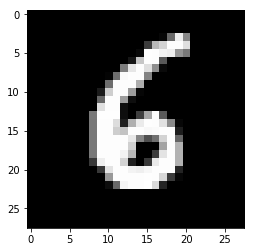

In [36]:
imshow(X[986], cmap='gray')

In [37]:
X[986].shape

(28, 28)

## We want to convert each data point  to a vector which dimensionality is 28x28 = 784

In [38]:
X = X.reshape(1000, 784)

In [39]:
X[926].shape

(784,)

## Now we test out PCA.

### Perform PCA

In [40]:
pca_2 = PCA(n_components = 2).fit(X)
# you can also use PCA(0.95) to find number components that have variance 95%

In [41]:
pca = pca_2.transform(X)
pca_2.explained_variance_ratio_

array([0.1003825 , 0.07777415])

### Plot the transformed data

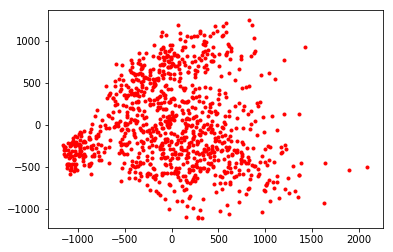

In [42]:
plt.scatter(pca[:,0], pca[:,1], marker='.', color='red')

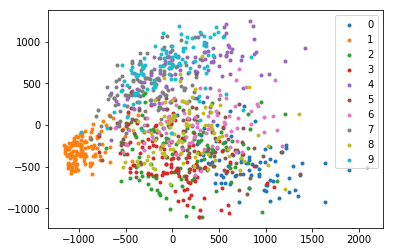

In [43]:
for label in set(Y):
	mask = Y==label
	plt.scatter(pca[:,0][mask], pca[:,1][mask], marker = '.', label = label)   #, color =  label + 1) #, label = str(label))
plt.legend()

### PCA on its own doesn't clearly separate different numbers into different regions of the 2D plane

# Try dimensionality reduction via PCA followed by t-SNE

This time perform PCA to keep 95% of original data variance

In [44]:
print("Number of components in original data: {}".format(len(X[0])))
pca_95 = PCA(0.95).fit(X) 
transformed_MNIST = pca_95.transform(X)
print("Number of components in transformed data: {}".format(len(transformed_MNIST[0])))
tsne = TSNE(n_components=2, verbose=1).fit_transform(transformed_MNIST)

Number of components in original data: 784
Number of components in transformed data: 131
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.005s...
[t-SNE] Computed neighbors for 1000 samples in 0.284s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 493.163354
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.756561
[t-SNE] KL divergence after 1000 iterations: 1.044389


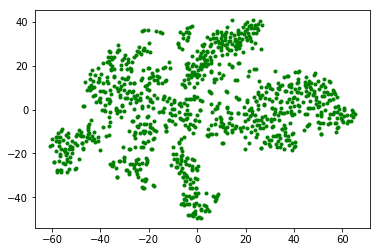

In [45]:
plt.scatter(tsne[:,0], tsne[:,1], marker='.', color='green')

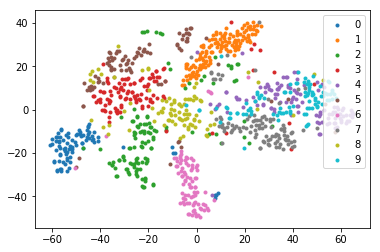

In [46]:
for label in set(Y):
	mask = Y==label
	plt.scatter(tsne[:,0][mask], tsne[:,1][mask], marker = '.', label = label)   #, color =  label + 1) #, label = str(label))
plt.legend()

### This time we get a better result! Out of curiosity, does tSNE perform as well without PCA?

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.034s...
[t-SNE] Computed neighbors for 1000 samples in 1.528s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 502.251680
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.321480
[t-SNE] KL divergence after 1000 iterations: 1.030242


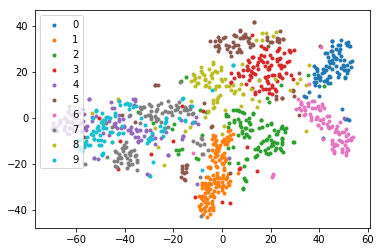

In [48]:
tsne_noPCA = TSNE(n_components=2, verbose=1).fit_transform(X)
for label in set(Y):
	mask = Y==label
	plt.scatter(tsne_noPCA[:,0][mask], tsne_noPCA[:,1][mask], marker = '.', label = label)   #, color =  label + 1) #, label = str(label))
plt.legend()

### It looks like performing PCA first really did help tSNE separate things better!